# Assignment 2018 - Programming for Data Analysis

In this assignment i will explore the numpy.random library in python. This is a useful and extensive library for generating random numbers and distributions, as well as randomly selecting items from an array. This assignment is divided into four sections:

- I will explain the purpose of the **numpy.random** libary and its limitations.

- The **simple random data** and **permutations** sections of the package will be examined in detail, including the inclusion of code to demonstrate their use.

- I use the **Distributions** section of the libary to explore seven different distributions and explain their significance.

- Finally, i will examine the **Random Generator** section, focusing on the differences between the numpy.random.see and numpy.random.RandomState functions. 

Before i begin, the below cell imports the various packages that i will be using in this assignment. This cell should always be run before continuing through the notebook to ensure that subsequent code runs correctly. 

As well, as numpy, matplotlib is used to create plots and python's random and time modules will be used in the notebook. random are secrets are other python random mudules to generate random numbers. 
%matplotlib inline is a **magic function** in Ipython/Jupyter Notebook, which ensures that matplotlib plots display correctly. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import secrets
%matplotlib inline

# 1. numpy.random

The numpy.random library randomly generates instances or arrays of floats or integers in a given size or shape. The permutations functions randomly select items from a list.  

The library can also generate a multitude of distributions in a given size, from the uniform to zipf distribution. These will be explored in more detail later in the notebook. 

The random.seed and random.randomstate functions allow the user to seed all numpy.random functions. In simple terms, a seeded function will ensure that the particularly function gives the same result every time until the seed is changed. This is particularly useful for debugging code. 

I will now look at **intervals** and limitations of numpy.random. 

## Intervals

Before, i go on, it is important to point out a key difference between functions is their interval type.  

If you print the help file for the rand function, it states that it will print a random float or floats between 0 and 1, in the form \[0,1\)

The "\[" means that it includes 0, but the "\)" denotes that it does not include 1. This is called a half-open or half-closed interval.

Other intervals are as follows [1]:

- \(0,1\] is a half open interval which excludes 0 and includes 1.

- \(0,1\) is an open interval which excludes both 0 and 1.

- \[0,1\] is a closed interval which includes 0 and 1. 

random.random_integers is a closed interval, while random.randint is half-open in the form  \[0,1). It is important to be aware of this when choosing an appropriate function. 

[\[1\]](http://www-history.mcs.st-and.ac.uk/~john/analysis/Lectures/L22.html)


In [3]:
print(help(np.random.rand))

Help on built-in function rand:

rand(...) method of mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, should all be positive.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Notes
    -----
    This is a convenience function. If you want an interface that
    takes a shape-tuple as the first argument, refer to
    np.random.random_sample .
    
    Examples
    --------
    >>> np.random.rand(3,2)
    array([[ 0.14022471,  0.96360618],  #random
           [ 0.37601032,  0.25528411],  #random
           [ 0.49313049,  0.94909878]]

## Pseudorandom Number Generator 

numpy.random is a Pseudorandom Number Generator (PRNG) using the Mersenne Twister (MT) algorithm to generate random numbers [1]. PRNG numbers are generated using mathematical formulas and are sufficently random for most purposes. However, PRNG numbers are pre-determined and not truly random. The MT homepage recommends against using it for cryptography, "... since from sufficiently long subsequence of the outputs, one can predict the rest of the outputs." [2].

True Random Number Generators use physical phenomena, such as radio static, to generate truly random numbers. Dr. Mads Haahr explains the difference between PRNG and TRNG as follows: 

>  PRNGs generate random numbers by using mathematical formulae or precalculated lists, using one corresponds to someone rolling a die many times and writing down the results. Whenever you ask for a die roll, you get the next on the list. Effectively, the numbers appear random, but they are really predetermined. TRNGs work by getting a computer to actually roll the die — or, more commonly, use some other physical phenomenon that is easier to connect to a computer than a die is [3].


Random numbers generated with numpy.random are acceptable for data analysis and most uses, however would not be acceptable for critical use, like cryptography. 

A Cryptographically secure pseudorandom number generator (CSPRNG) is available in python using the **secrets** module [4]. The code in the next cell generates a random number between 0 and 100. As you can see it is a half-open interval.

[\[1\]](https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781785285110/2/ch02lvl1sec16/numpy-random-numbers)
[\[2\]](http://www.math.sci.hiroshima-u.ac.jp/~m-mat/MT/efaq.html)
[\[3\]](https://www.random.org/randomness/)
[\[4\]](https://docs.python.org/3/library/secrets.html)


In [6]:
print(secrets.randbelow(101))

64


## 2. Simple Random Data

### rand and randn

random.rand gives floats from a uniform distribution and random.randn gives floats from a uniform distribution. The below code prints two random numbers from each function.

In [22]:
print(np.random.rand(2))
print(np.random.randn(2))

[0.96697185 0.05150723]
[-0.46175244 -0.58121838]


A histogram generated with both functions will explain the differences more clearly. 

random.rand gives a random float or floats from a uniform distribution between 0 and 1. The below histogram shows 1000 random numbers generated with this function. All numbers have an equal chance of being generated; all blue bins are of relative equal height. The mean of a uniform distribution between 0 and 1 will be approximately 0.5, as demonstrated below in the next cell.

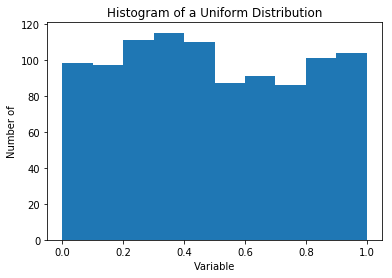

In [23]:
r = np.random.rand(1000)
plt.hist(r)
plt.ylabel('Number of')
plt.xlabel('Variable')
plt.title("Histogram of a Uniform Distribution")
plt.show()

In [24]:
np.mean(r)

0.4924219372877823

random.randn gives a random float or floats from a normal distribution with a mean of 0 and a variance of 1. The below histogram shows 1000 random numbers generated with this function. The mean and medium will be similar as demonstrated in the next cell. 

In a normal distributions most values are clustered around the mean, meaning that these values are more likely to be generated. Values further from the mean are less likely to be generated. 

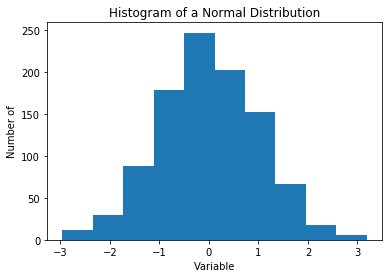

In [26]:
rn = np.random.randn(1000)
plt.hist(rn)
plt.ylabel('Number of')
plt.xlabel('Variable')
plt.title("Histogram of a Normal Distribution")
plt.show()

In [27]:

print("The mean is ", np.mean(rn))
print("The median is ", np.median(rn))

The mean is  0.006147471814270194
The median is  -0.016169852910740693


### random integer

np.random.randint produces a random integer (real number) from a uniform distribution (all numbers are equally likely to be picked). The other function np.random.random_integers produces a similar result but is deprecated. 

The below game uses randint to pick a random real number between 1 and 100. 

In [28]:
while True: # This code ensures that the user inputs Hard or Easy. Cite: https://stackoverflow.com/questions/29200952/how-to-only-allow-some-inputs-python
    ans = input("Guess a number between 1 and 100. Type Hard or Easy in the box")
    ans = ans.title() # The user can enter uppercase or lowercase and it will still be accepted.
    if ans not in ('Hard', "Easy"):
        print("Type Easy or Hard.")
    else:
        break # If they do choose correctly, the while loop breaks and goes to the next code.
        
        
if ans == "Hard": # If they choose Hard, they get 5 trys; easy gives them 10.
    ans = 5
else:
    ans = 10
    


num = np.random.randint(1,100) # The random number is generated

for x in range(ans): # For loop gives them a certain amount of tries - based on their "hard" or "easy" input earlier.
    guess = int(input("Guess a number between 1 and 100. You have " + str(ans) + " trys." ))
    
    if guess < num:
        print("Too low") # A warning is printed if they are too high or too low
    
    elif guess > num:
        print("Too high")
        
    else:
        break
        
if guess == num:
    
    print("You guessed right!")

else:
    print("Sorry, the number is " + str(num))

    
  
    

    

    
    

Guess a number between 1 and 100. Type Hard or Easy in the boxeasy
Guess a number between 1 and 100. You have 10 trys.50
Too high
Guess a number between 1 and 100. You have 10 trys.25
Too high
Guess a number between 1 and 100. You have 10 trys.15
Too high
Guess a number between 1 and 100. You have 10 trys.10
Too low
Guess a number between 1 and 100. You have 10 trys.12
Too low
Guess a number between 1 and 100. You have 10 trys.14
You guessed right!


### random samples

random.random_sample, random.random, random.ranf and random.sample all perform the same function. They generate floats from a continuous uniform distribution in a half-open interval from 0 inclusive to 1 exclusive [1]. 

A continuous distribution contains uncountable values, while a discrete distribution contains countable values. 

In the next two cells, we see a random float and then a histogram generated using random.random_sample demonstrating that it is, indeed, a continuous uniform distribution . 

[\[1\]](https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions)



In [6]:
print(np.random.random_sample())

0.5253734380371808


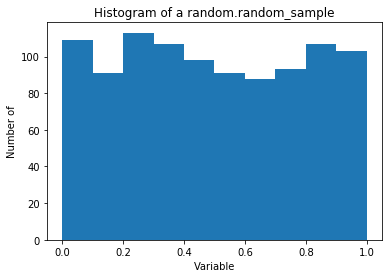

In [8]:
rrs = np.random.rand(1000)
plt.hist(rrs)
plt.ylabel('Number of')
plt.xlabel('Variable')
plt.title("Histogram of a random.random_sample")
plt.show()

### choices

The choice and choices functions randomly select a given number of items from a given array. In other words, it can generate a random sample. This will be explained more clearly with the following example. 

#### The Central Limit Theorem

The central limit theorem is a key theory in statistics and data analysis. In simple terms, it states that he mean of samples taken from a non-normal distribution will have a normal distribution if the samples are of a sufficently large size [1] 

As a result, statistical tests requiring a normal distribution can be performed on samples of a population, even if the population itself is not normally distributed. 

1. random.rand is used to generate 10000 numbers in a clearly uniform distribution.
2. random.choices is used to take a random sample of 50 from the uniform distribution. The sample mean is calculated.
3. The above operation is performed 1000 times. 
4. The results are then ploted demonstrating that they have a uniform distribution.

[\[1\]](https://stattrek.com/statistics/dictionary.aspx?definition=central_limit_theorem)

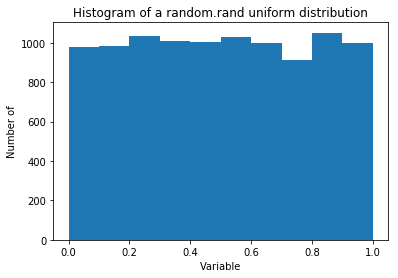

In [20]:
x = np.random.rand(10000) # random.rand generates a random distribution.
plt.ylabel('Number of')
plt.xlabel('Variable')
plt.title("Histogram of a random.rand uniform distribution")

plt.hist(x)
plt.show()

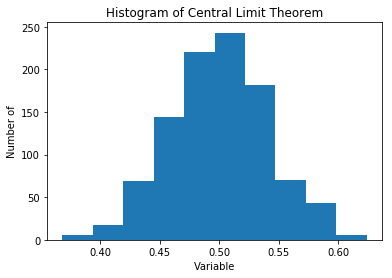

In [21]:
#cite: https://www.youtube.com/watch?v=Ecs_JPe9gCM&
y = np.random.rand(10000) # Uniform distribution created again
samples = [] # Empty list created 
for x in range(1000): # The below operation is performed 1000 times
    samples.append(np.mean(random.choices(y,k=50))) # choices takes a sample of 50. The mean of the sample is calculated and is added to the empty list.

plt.hist(samples)
plt.ylabel('Number of')
plt.xlabel('Variable')
plt.title("Histogram of Central Limit Theorem")
plt.show()


    




random.bytes generates bytes of a given length. The results are given in ASCII.

In [41]:
print(np.random.bytes(1))

b'4'


## 3. Permutations

The functions in permutations randomly shuffle a given array. The below game demonstrates how it works. 
1. A random animal is chosen from a list using random.choices. 
2. The animal name is converted into a list of its component letters.
3. random.permutation is used to randomly scramble the letters.
4. The scrambled letters are presented to the user who guess the animal name. 

In [44]:
def unScramble(): # function to return the scrambled animal name is created
    animals = ["cat","dog","fish", "sheep", "chicken", "elephant", "giraffe", "goat", "lion", "tiger", "rabbit" ] # list of animals
    global x # variable x is made global: it can now be referred to by code out side of the function
    x = np.random.choice(animals) # random animal is chosen from list

    jumble = []
    for i in x: # for loop is used to create a list of the letters
        jumble.append(i)


    y = print(np.random.permutation(jumble)) # the letters are shuffled using permutation
    return(y)


    








In [45]:
while True: # user must choose an easy or hard game 
    ans = input("Unscramble. Type Hard or Easy in the box")
    ans = ans.title()
    if ans not in ('Hard', "Easy"):
        print("Type Easy or Hard.")
    else:
        break 
               
if ans == "Hard": 
    ans = 5
else:
    ans = 10

unScramble() # above function is called. 

countdown_start = time.time() # countdown timer is started based o user input. Cite: https://stackoverflow.com/questions/13293269/how-would-i-stop-a-while-loop-after-n-amount-of-time
while time.time() < countdown_start + int(ans):
    
    answer = input("You have " + str(ans) + " seconds. Unscramble and enter the animal here ")
    answer = answer.lower()
    
    
    if answer == x and time.time() <= countdown_start + int(ans):
        print("you guessed right!") 
        break
        
    elif answer != x and time.time() <= countdown_start + int(ans):
        print("Try again")
    
    elif answer != x and time.time() > countdown_start + int(ans):
        print("Out of time! The animal is a " + x)
    
    elif answer == x and time.time() > countdown_start + int(ans):
        print("Too late!")
              







        

Unscramble. Type Hard or Easy in the boxeasy
['r' 'b' 'b' 'i' 't' 'a']
You have 10 seconds. Unscramble and enter the animal here rabbit
you guessed right!


## 3. Distributions

In this section, we will examine seven distributions in numpy.random. I will use numpy to generate an example and explain its purpose. The distributions are as follows: 

1. Uniform Distribution
2. Normal Distribution
3. Bernouli Distribution
4. Binomial Distribution
5. Negative Binomial Distribution

#### Uniform Distribution

In a uniform distribution, all values have an equal chance of appearing. In the Irish Lotto, a participant chooses 6 numbers between 1 and 47 [1]. What number is likely to be the winning number? In the Lotto, every number between 1 and 47 has an equal chance of being picked. 

The function random.uniform creates a continuous distribution. The lotto is discrete (whole numbers), so i will use random.randint.

The below cell picks a number between 1 and 47 (it is a half-open interval) 10000 times. An histogram is created showing the results. This is equivalent to picking the last winning number in the Lotto 10000 times.  

You can see that every number appears to win a similar amount of times. The mean is printed below the plot and is not any more likely to win than any other number. 

[\[1\]](https://www.lottoland.ie/irishlotto/help)

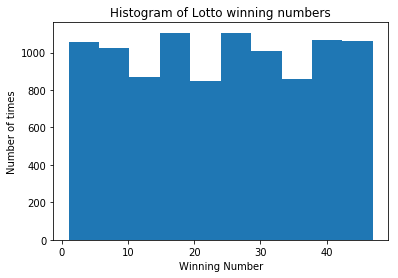

23.9932


In [13]:
lotto = np.random.randint(1,48,10000)

plt.hist(lotto)
plt.ylabel('Number of times')
plt.xlabel('Winning Number')
plt.title("Histogram of Lotto winning numbers")
plt.show()
print(np.mean(lotto))

#### Normal Distribution

The normal distribution is a common distribution in the real world; height, weight and IQ scores tend to be normally distributed [1].

A normal distribution is also called a bell curve. Values are clustered around the mean and reduce the farther you get from it. It is symmetrical in shape. 

The below example regarding Irish male height should elucidate the normal distribution. It is purely for demonstration purposes. 

The average Irish male born in 1980 is 176cm (5ft 9ins) tall [2].The standard deviation of male height (in the USA) is approximately 7.4 cm (2.9ins) [3].

We can now create a normal distribution of male height in Ireland after measuring 10000 men. The plot would look as below. 

Due to the shape of the normal distribution, we may be able to make the following predictions [4]:

- Approximately 68% of Irish men would be within 1 standard deviation 7.4 cm (2.9ins) of the mean height 176cm (5ft 9ins). 

- Fewer than 5% of Irish men born in 1980 would be (two standard deviations) shorter than 161.2 cm (5ft 4ins) or taller than 190.8 cm (6ft 3ins). 

[\[1\]](http://www.usablestats.com/lessons/normal)
[\[2\]](https://www.irishtimes.com/news/ireland/irish-news/average-height-of-irish-men-is-8cm-more-than-100-years-ago-1.1513940)
[\[3\]](http://www.stat.columbia.edu/~martin/W1111/Review2.pdf)
[\[4\]](https://www.statisticshowto.datasciencecentral.com/68-95-99-7-rule/)

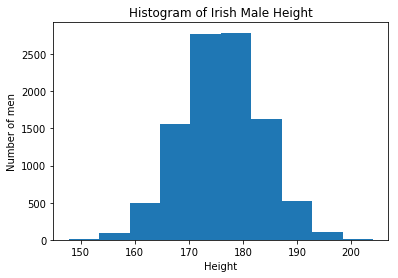

In [10]:
 h = np.random.normal(176, 7.4, 10000) # the mean height is 176 cm, the standard deviation is 7.4 cm and 10000 values are generated


plt.hist(h)
plt.ylabel('Number of men')
plt.xlabel('Height')
plt.title("Histogram of Irish Male Height")
plt.show()

#### Bernoulli Distribution 

A bernoulli distribution has the following characteristics:

1. There are only two possible outcomes
2. There is a given probability for each outcome occuring

A good example is the flipping of a coin: There are two possible outcomes - heads or tails and a 50% of getting each outcome.

The below code shows the outcome of flipping a coin once and performing this experiment 1000 times. You can see that there is an approximately .5 chance of getting tails. 

The histogram shows that heads and tails (0 and 1) occur a similar amount of times.

The next 4 distributions are all based on the bernoulli distribution.

In [21]:
coin = np.random.binomial(1, 0.5, 1000) 
print("There is a", sum(coin == 1)/1000, "chance of getting tails.") # Cite: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.binomial.html#numpy.random.binomial

There is a 0.536 chance of getting tails.


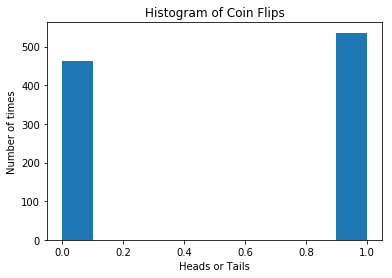

In [22]:
plt.hist(coin)
plt.ylabel('Number of times')
plt.xlabel('Heads or Tails')
plt.title("Histogram of Coin Flips")
plt.show()


#### Binomial Distribution

A binomial distribution is a bernouli distribution with more than one independent trial [1]. We can add the following characteristic below:

1. There are only two possible outcomes
2. There is a given probability for each outcome occuring
3. There are a given number of independent trials. 
 
 [\[1\]](https://www.statisticshowto.datasciencecentral.com/bernoulli-distribution/)

You have a 1/6 chance of getting a 6 when you role a dice.  There are two outcomes: you get a 6 (succes) or you do not get a 6 (failure). You role a dice 3 times, what are your chances of getting a 6?
You perform this experiment 1000 times. As you can see below it is in the region of 34%.

The plot shows that when you perform the experiment 1000 times, you don't get 6 around 600 times. You roll 6 on all of your 3 rolls only a handful of times. 

In [25]:
dice = np.random.binomial(3, 0.167, 1000) # if n=1 this would be a bernouli distribution.
sum(dice == 1)/1000.

0.356

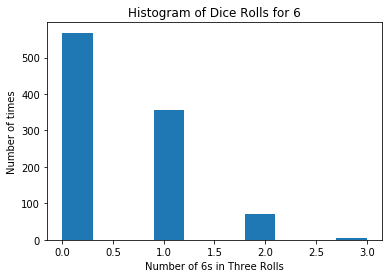

In [26]:
plt.hist(dice)
plt.ylabel('Number of times')
plt.xlabel('Number of 6s in Three Rolls')
plt.title("Histogram of Dice Rolls for 6")
plt.show()

#### Geometric Distribution

The geometric distribution shows the number of independent bernouli trials needed until the first success. In other words, it can tell you the probability of achieving the first success on a given try. 

In [ ]:
geo = np.random.geometric(p=0.167, size=10)

turn = input()

p = (geo == int(turn)).sum() / 10

print("Your probability of getting your first 6 on role number " + str(turn) + " is " + str(p)) 

#plt.hist(z)
#plt.show()

#### Negative Binomial Distribution

In [32]:
p = int(input("Enter amount of dice rolls "))
s = np.random.negative_binomial(1, 0.167, 100000)
for i in range(p+1):
 probability = sum(s<i) / 100000.
print ("After " + str(i) + " attempts at rolling a dice, you have a " + str(probability) + " probability of having rolled a 6")

Enter amount of dice rolls 12
After 12 attempts at rolling a dice, you have a 0.88805 probability of having rolled a 6


In [8]:
rs = np.random.RandomState(5)
numList = rs.randint(100, size=5)
numList = sorted(numList)
seq = list(np.random.permutation(numList))


print(seq)

guess = input("order the numbers")
numbers = list(map(int, guess.split())) # https://stackoverflow.com/questions/4663306/get-a-list-of-numbers-as-input-from-the-user



if numbers == numList:
    print("Good Job")
    
        
elif numbers != numList:
    print("Sorry, wrong answer!")
    

[16, 73, 61, 99, 78]
order the numbers16 61 73 78 99
Good Job


Random seed changes the global seed for numpy.random

In [26]:
np.random.seed(1)
print(np.random.rand(5))
print(np.random.randint(10, size=5))

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01]
[0 1 7 6 9]


In [27]:
np.random.seed(1)
print(np.random.rand(5))
print(np.random.randint(10, size=5))

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01]
[0 1 7 6 9]
